# OpenAI Gym
- It is a toolkit for developing and comparing reinforcement learning (RL) algorithms.
- It consist of two parts:
  - **gym open-source library**: A collection of test problems (**environments**) with a common interface.
  - **OpenAI Gym service**: A site and API for comparing performance of trained agents

# Observation
An environment returns four values:
- `observation` (object): environment-specific object representing observation of the environment.
- `reward` (float): amount of reward achieved by the previous action.
- `done` (boolean): If the task is divided into episodes, indicates that the episode has terminated.
- `info` (dict): Diagnostic information useful for debugging. E.g. raw probabilities behid the env. last state change.

# Running an environment

In [1]:
%matplotlib notebook
# %matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

environment_name = 'Acrobot-v1'

env = gym.make(environment_name)
# print(env.render(mode='rgb_array', close=False))
# result = plt.imshow(env.render(mode='rgb_array', close=True))
# print(result)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


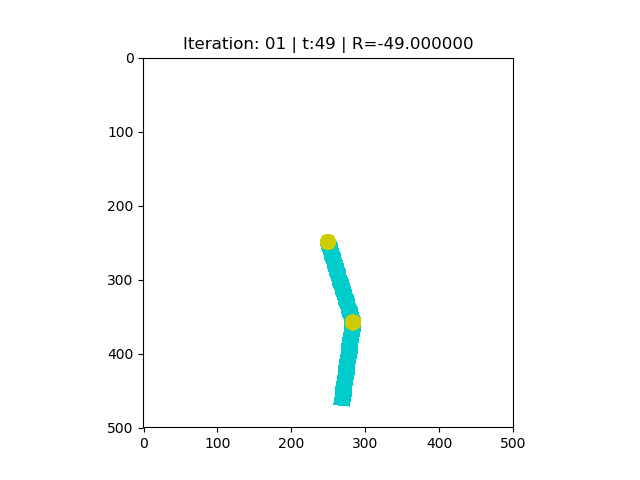

<IPython.core.display.Javascript object>


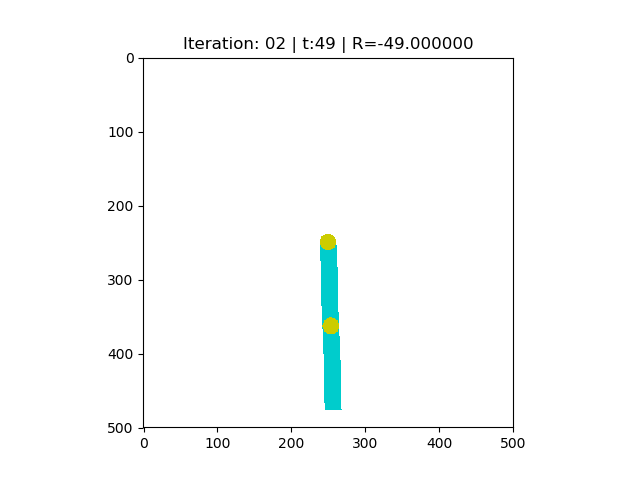

TypeError: render() got an unexpected keyword argument 'close'

In [2]:
total_episodes = 2
max_t = 50

figs = [None for _ in range(total_episodes)]
axs = [None for _ in range(total_episodes)]
gym_renders = [None for _ in range(total_episodes)]

env.reset()  # To have something to plot
for ee in range(total_episodes):
    figs[ee] = plt.figure()
    axs[ee] = figs[ee].add_subplot(1,1,1)
    gym_renders[ee] = axs[ee].imshow(env.render(mode='rgb_array'))
    figs[ee].canvas.set_window_title('%s -- Iteration: %02d' % (environment_name, ee+1))

for ee in range(total_episodes):
    total_reward = 0
    observation = env.reset()
    for t in range(max_t):
        gym_renders[ee].set_data(env.render(mode='rgb_array'))
        figs[ee].canvas.draw()
    #     display.clear_output(wait=True)
    #     display.display(fig)
        action = env.action_space.sample()  # Take a random action
        observation, reward, done, info = env.step(action)
        total_reward += reward
        axs[ee].set_title('Iteration: %02d | t:%01d | R=%f' % (ee+1, t+1, total_reward))
        if done:
            print("Episode %02d finished after %d timesteps" % (ee+1, t+1))
            break
# env.render(close=True)
env.close()
plt.close('all')

# Spaces
The action and observations spaces can be any of the next `Space` objects:
- `Discrete`: Fixed range of non-negative numbers
- `Box`: A n-dimensional box, n-dimensional array
- `Tuple`:
- `Dict`:
- `MultiBinary`:
- others


In [ ]:
import gym
env = gym.make('CartPole-v0')

# Check spaces types:
print(env.action_space)
print(env.observation_space)

# Check bounds
print(env.observation_space.high)
print(env.observation_space.low)

# Sample from the spaces
obs_sample = env.observation_space.sample()
act_sample = env.action_space.sample()
print(obs_sample)
print(act_sample)

# Check proper action / observations
assert env.action_space.contains(act_sample)

## Environments
- Classic control
- Algorithmic
- Atari
- Board games
- Box2D
- MuJoCo
- Parameter tuning
- Toy text
- Safety
- Minecraft
- PyGame Learning Environment
- Soccer
- Doom

In [ ]:
from gym import envs
print(envs.registry.all())

# References
- Gym documentation: [website](https://gym.openai.com/docs/)